In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import glob # for bringing all parts back together

# Read Data For Split Datasets

In [10]:

# Below is old read in data, before I had to split it into parts for github.
#appleData = pd.read_csv("appleAppData.csv")
#googleData = pd.read_csv("Google-Playstore.csv")


# Below is going to combine everything from the split data sets. 
appleData = glob.glob("appleDataEdit*.csv")

appledfs = []
for file in appleData:
    tempdf = pd.read_csv(file)
    appledfs.append(tempdf)

appleDataTogether = pd.concat(appledfs, ignore_index=True)
appleDataTogether.head()


,Unnamed: 0,App_Id,App_Name,Primary_Genre,Content_Rating,Price,Free,DeveloperId,Developer,Average_User_Rating,Reviews,Current_Version_Score,Current_Version_Reviews
0,0,com.hkbu.arc.apaper,A+ Paper Guide,Education,4+,0.00,True,1375410542,HKBU ARC,0.0,0,0.0,0
1,1,com.dmitriev.abooks,A-Books,Book,4+,0.00,True,1031572001,Roman Dmitriev,5.0,1,5.0,1
2,2,no.terp.abooks,A-books,Book,4+,0.00,True,1457024163,Terp AS,0.0,0,0.0,0
3,3,fr.antoinettefleur.Book1,A-F Book #1,Book,4+,2.99,False,439568839,i-editeur.com,0.0,0,0.0,0
4,4,com.imonstersoft.azdictionaryios,A-Z Synonyms Dictionary,Reference,4+,0.00,True,656731821,Ngov chiheang,0.0,0,0.0,0


In [11]:
googleData = glob.glob("googleDataEdit*.csv")

googledfs = []
for file in googleData:
    tempdf = pd.read_csv(file)
    googledfs.append(tempdf)

googleDataTogether = pd.concat(googledfs, ignore_index=True)
googleDataTogether.head()

,Unnamed: 0,App Name,App Id,Category,Rating,Rating Count,Installs,Minimum Installs,Maximum Installs,Free,Price,Currency,Size,Minimum Android,Developer Id,Released,Content Rating
0,0,Gakondo,com.ishakwe.gakondo,Adventure,0.0,0.0,10,10.0,15,True,0.0,USD,10M,7.1 and up,Jean Confident Irénée NIYIZIBYOSE,"Feb 26, 2020",Everyone
1,1,Ampere Battery Info,com.webserveis.batteryinfo,Tools,4.4,64.0,5000,5000.0,7662,True,0.0,USD,2.9M,5.0 and up,Webserveis,"May 21, 2020",Everyone
2,2,Vibook,com.doantiepvien.crm,Productivity,0.0,0.0,50,50.0,58,True,0.0,USD,3.7M,4.0.3 and up,Cabin Crew,"Aug 9, 2019",Everyone
3,3,Smart City Trichy Public Service Vehicles 17UC...,cst.stJoseph.ug17ucs548,Communication,5.0,5.0,10,10.0,19,True,0.0,USD,1.8M,4.0.3 and up,Climate Smart Tech2,"Sep 10, 2018",Everyone
4,4,GROW.me,com.horodyski.grower,Tools,0.0,0.0,100,100.0,478,True,0.0,USD,6.2M,4.1 and up,Rafal Milek-Horodyski,"Feb 21, 2020",Everyone


In [15]:
#In this cell are all the old commands used on the original datasets to get them in a cleaned and edited state before spliting into parts and reloading them.

# # Removing null values from less impt columns for analyzing data
# googleData.dropna(subset=['Size', 'Currency', 'Installs', 'Minimum Installs', 'App Name','Developer Id', 'Developer Email'  ], inplace=True)

# googleData.isnull().sum() #checking the null values after removing
# keeping the Rating, Rating count, Min Android, Developer Website, Released and Privacy Policy because these are more important for now
# Cleaning google Data - 
# googleData['Installs'] = googleData['Installs'].apply(lambda x: x.replace('+','')) # to remove the + in all the install values
# googleData['Installs'] = googleData['Installs'].apply(lambda x: x.replace(',','')) # removing commas in numbers

# googleData['Installs'] = googleData['Installs'].astype(np.int64) # using numpy to change typ to int64 
# googleData['Installs'].unique()

# Looking at Google App Data
### (After being edited, cleaned, and split into parts)

In [16]:
googleAppName = googleDataTogether["App Name"]
googleAppName.describe()

count         2312545
unique        2177592
top       Tic Tac Toe
freq              382
Name: App Name, dtype: object

In [17]:
googleDataTogether.columns

Index(['Unnamed: 0', 'App Name', 'App Id', 'Category', 'Rating',
       'Rating Count', 'Installs', 'Minimum Installs', 'Maximum Installs',
       'Free', 'Price', 'Currency', 'Size', 'Minimum Android', 'Developer Id',
       'Released', 'Content Rating'],
      dtype='object')

In [18]:
googleDataTogether.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2312545 entries, 0 to 2312544
Data columns (total 17 columns):
 #   Column            Dtype  
---  ------            -----  
 0   Unnamed: 0        int64  
 1   App Name          object 
 2   App Id            object 
 3   Category          object 
 4   Rating            float64
 5   Rating Count      float64
 6   Installs          int64  
 7   Minimum Installs  float64
 8   Maximum Installs  int64  
 9   Free              bool   
 10  Price             float64
 11  Currency          object 
 12  Size              object 
 13  Minimum Android   object 
 14  Developer Id      object 
 15  Released          object 
 16  Content Rating    object 
dtypes: bool(1), float64(4), int64(3), object(9)
memory usage: 284.5+ MB


In [19]:
googleDataTogether.isnull().sum().sort_values(ascending=False)
# Finding the missing values in each section of the dataset

Released            70748
Rating              22572
Rating Count        22572
Minimum Android      6530
Unnamed: 0              0
Price                   0
Developer Id            0
Size                    0
Currency                0
Maximum Installs        0
Free                    0
App Name                0
Minimum Installs        0
Installs                0
Category                0
App Id                  0
Content Rating          0
dtype: int64

In [20]:
googleTopCategories = googleDataTogether.Category.value_counts()
googleTopCategories.head(10)

Category
Education            241068
Music & Audio        154897
Tools                143971
Business             143749
Entertainment        138259
Lifestyle            118321
Books & Reference    116716
Personalization       89207
Health & Fitness      83497
Productivity          79681
Name: count, dtype: int64

# Google Play Store Visualizations

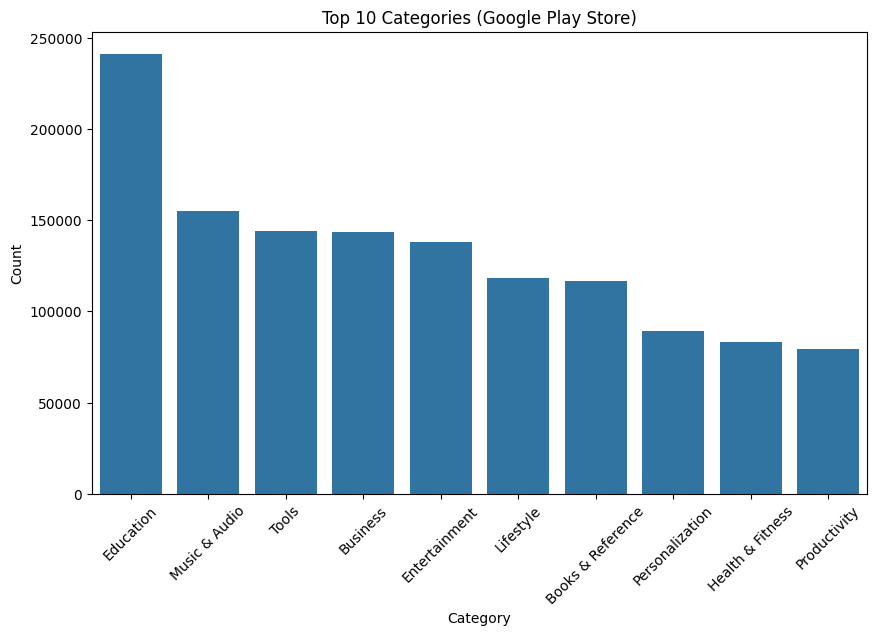

In [21]:
googleTopCategories = googleDataTogether['Category'].value_counts().head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x=googleTopCategories.index, y=googleTopCategories.values)
plt.title("Top 10 Categories (Google Play Store)")
plt.xticks(rotation=45)
plt.ylabel("Count")
plt.show()

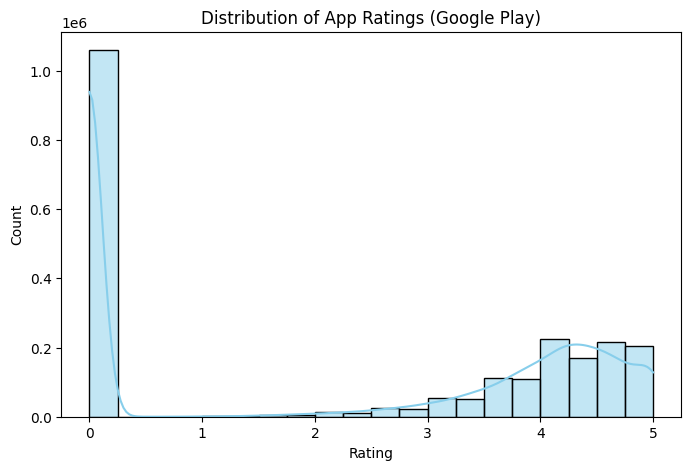

In [22]:
plt.figure(figsize=(8,5))
sns.histplot(googleDataTogether['Rating'].dropna(), bins=20, kde=True, color='skyblue')
plt.title("Distribution of App Ratings (Google Play)")
plt.xlabel("Rating")
plt.ylabel("Count")
plt.show()

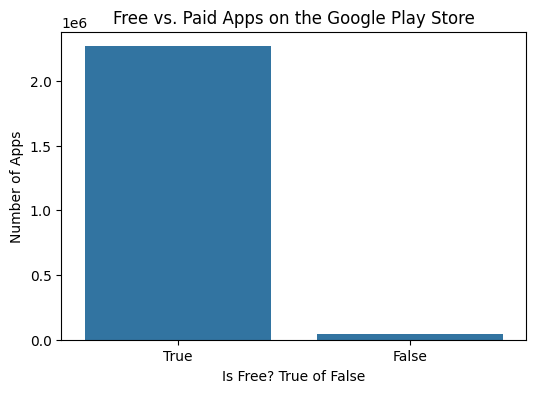

In [25]:
freeVSPaid = googleDataTogether['Free'].value_counts()
plt.figure(figsize=(6, 4))
sns.barplot(x=freeVSPaid.index.astype(str), y=freeVSPaid.values)
plt.title("Free vs. Paid Apps on the Google Play Store")
plt.xlabel("Is Free? True of False")
plt.ylabel("Number of Apps")
plt.show()

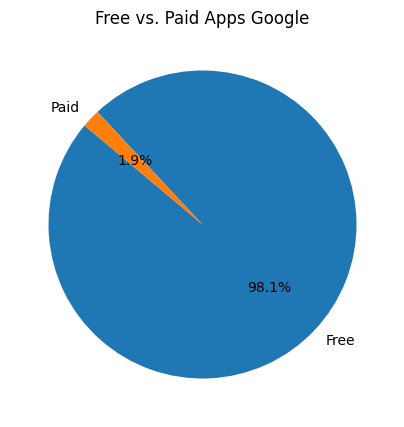

In [26]:
plt.figure(figsize=(5,5))
labels = ["Free", "Paid"] if len(freeVSPaid) == 2 else freeVSPaid.index
plt.pie(freeVSPaid, labels=labels, autopct='%1.1f%%', startangle=140)
plt.title("Free vs. Paid Apps Google")
plt.show()

## Looking for a relation between category crowds and Average Ratings

In [27]:
googleTopCategories = googleDataTogether.groupby('Category')['Rating'].mean().sort_values(ascending=False)

categorydf = pd.DataFrame({'Count': googleTopCategories,'Rating': googleDataTogether.groupby('Category')['Rating'].mean()
}).dropna().sort_values(by='Count', ascending=False)

categorydf.head(10)

,Count,Rating
Category,,
Role Playing,3.384498,3.384498
Casino,3.279682,3.279682
Simulation,3.210887,3.210887
Weather,3.120171,3.120171
Card,3.085171,3.085171
Racing,2.960385,2.960385
Video Players & Editors,2.903842,2.903842
Word,2.902076,2.902076
Strategy,2.878900,2.878900


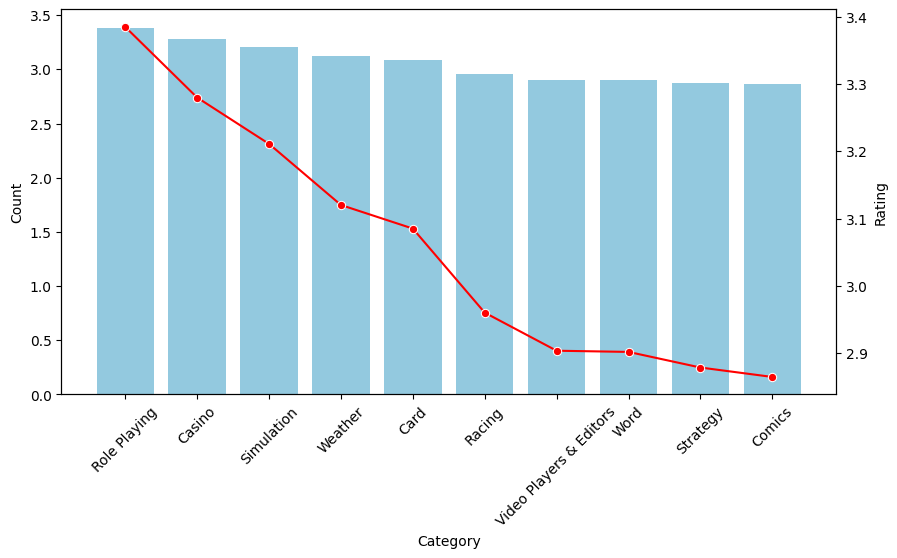

In [22]:
top10 = categorydf.head(10)

fig, ax1 = plt.subplots(figsize=(10,5))
ax2 = ax1.twinx()

sns.barplot(x=top10.index, y='Count', data=top10, ax=ax1, color='skyblue')
sns.lineplot(x=top10.index, y='Rating', data=top10, ax=ax2, marker='o', color='red')
ax1.tick_params(axis='x', rotation=45) #makes the names readable. 


# Looking at Apple App Data
### (After being edited, cleaned, and split into parts)

In [29]:
appleDataTogether.columns

Index(['Unnamed: 0', 'App_Id', 'App_Name', 'Primary_Genre', 'Content_Rating',
       'Price', 'Free', 'DeveloperId', 'Developer', 'Average_User_Rating',
       'Reviews', 'Current_Version_Score', 'Current_Version_Reviews'],
      dtype='object')

In [30]:
missingAppleData = appleDataTogether.isnull().sum().sort_values(ascending=False)
missingAppleData

Price                      490
App_Name                     1
Unnamed: 0                   0
App_Id                       0
Primary_Genre                0
Content_Rating               0
Free                         0
DeveloperId                  0
Developer                    0
Average_User_Rating          0
Reviews                      0
Current_Version_Score        0
Current_Version_Reviews      0
dtype: int64

In [31]:
topAppleGenres = appleDataTogether['Primary_Genre'].value_counts().head(10)
topAppleGenres

Primary_Genre
Games               193749
Business            128297
Education           119174
Utilities            94007
Lifestyle            84565
Food & Drink         73157
Health & Fitness     60724
Productivity         59430
Entertainment        53147
Shopping             49537
Name: count, dtype: int64

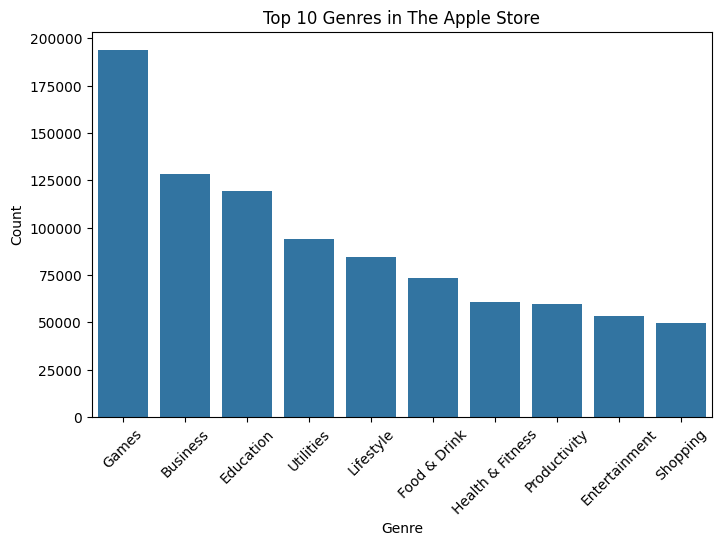

In [32]:
plt.figure(figsize=(8,5))
sns.barplot(x=topAppleGenres.index, y=topAppleGenres.values)
plt.title("Top 10 Genres in The Apple Store")
plt.xticks(rotation=45)

plt.xlabel("Genre")
plt.ylabel("Count")
plt.show() # USE TO REMOVE THE WEIRD TEXT IN THE TOP

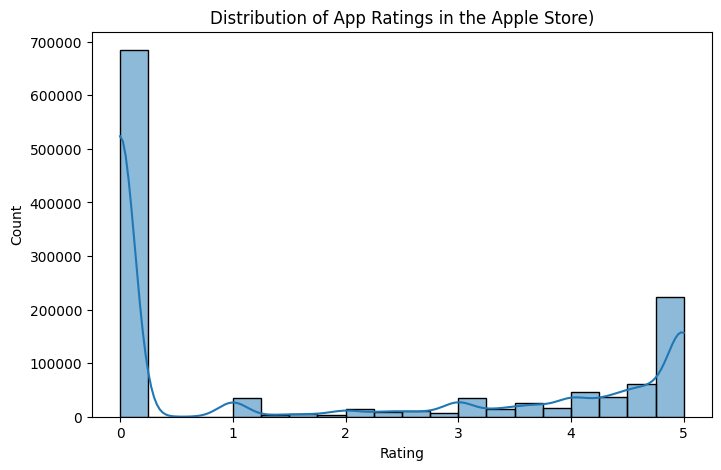

In [33]:
plt.figure(figsize=(8,5))
sns.histplot(appleDataTogether['Average_User_Rating'].dropna(), bins=20, kde=True)
plt.title("Distribution of App Ratings in the Apple Store)")

plt.xlabel("Rating")
plt.ylabel("Count")
plt.show()

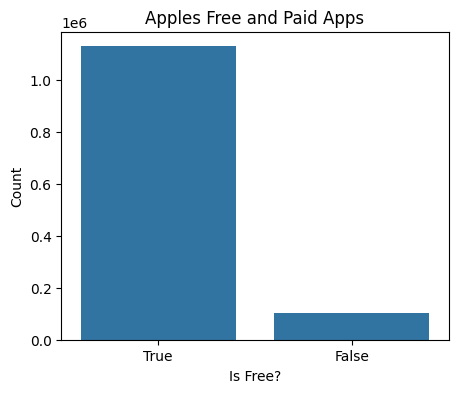

In [34]:
appleFreePaid = appleDataTogether['Free'].value_counts()

plt.figure(figsize=(5,4))
sns.barplot(x=appleFreePaid.index.astype(str), y=appleFreePaid.values)
plt.title("Apples Free and Paid Apps")


plt.xlabel("Is Free?")
plt.ylabel("Count")
plt.show()

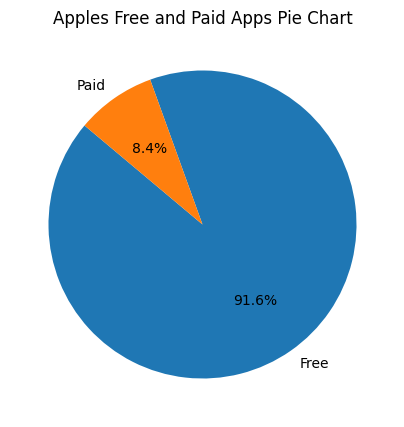

In [35]:
plt.figure(figsize=(5,5))
labels = ["Free", "Paid"] if len(appleFreePaid) == 2 else appleFreePaid.index
plt.pie(appleFreePaid, labels=labels, autopct='%1.1f%%', startangle=140)
plt.title("Apples Free and Paid Apps Pie Chart")
plt.show()

# Analyzing Apple and Google App Stores Together
### (Using the data that has been edited, cleaned and split into parts)


## Rating distribution across Google and Apple Apps

In [36]:
googleRatings = googleDataTogether['Rating'].dropna()
appleRatings = appleDataTogether["Average_User_Rating"].dropna()


# had lots of reviews at 0, which is the nan value for hasnt been reviewed. So removed these below.
googleRatings = googleRatings[googleRatings>0]
appleRatings = appleRatings[appleRatings>0]

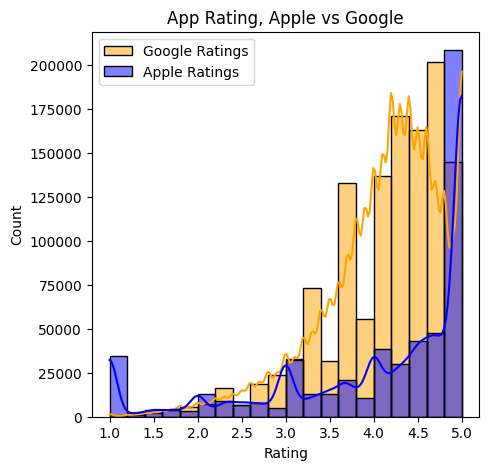

In [37]:
plt.figure(figsize=(5,5))
sns.histplot(googleRatings, label='Google Ratings', color='orange', kde=True, bins=20, alpha=0.5)
sns.histplot(appleRatings, label='Apple Ratings', color='blue', kde=True, bins=20, alpha=0.5)

plt.title("App Rating, Apple vs Google")
plt.xlabel("Rating")
plt.ylabel("Count")
plt.legend()
plt.show()

## Which Store has the Most Poor Quality Apps?
Poor quality is defined as having rating less the 2

Google poor-quality apps: 13344 / 1230242 (~1.08%)
Apple poor-quality apps:  47050 / 546056 (~8.62%)


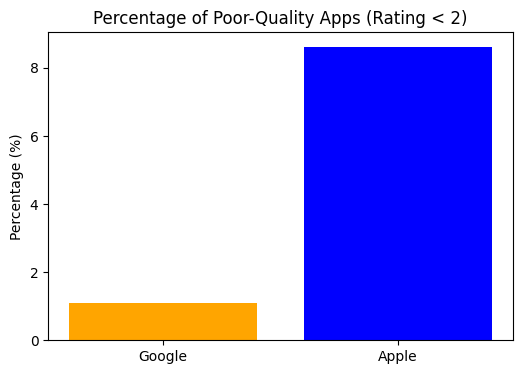

In [42]:
googleRated = googleDataTogether[googleDataTogether['Rating'] > 0]
googlePoor = googleRated[googleRated['Rating'] < 2]
googlePoorLen = len(googlePoor)
googleRatedlen = len(googleRated)


appleRated = appleDataTogether[appleDataTogether['Average_User_Rating'] > 0]
applePoor = appleRated[appleRated['Average_User_Rating'] < 2]
applePoorLen = len(applePoor)
appleRatedLen = len(appleRated)

googlePoorMath = (googlePoorLen / googleRatedlen) * 100 if googleRatedlen else 0
applePoorMath = (applePoorLen / appleRatedLen) * 100 if appleRatedLen else 0

print(f"Google poor-quality apps: {googlePoorLen} / {googleRatedlen} (~{googlePoorMath:.2f}%)")
print(f"Apple poor-quality apps:  {applePoorLen} / {appleRatedLen} (~{applePoorMath:.2f}%)")

platforms = ["Google", "Apple"]
poorPercent = [googlePoorMath, applePoorMath]

plt.figure(figsize=(6,4))
plt.bar(platforms, poorPercent, color=['orange','blue'])
plt.title("Percentage of Poor-Quality Apps (Rating < 2)")
plt.ylabel("Percentage (%)")
plt.show()


# Will the OS Affect User Reviews in a Similar Category? 

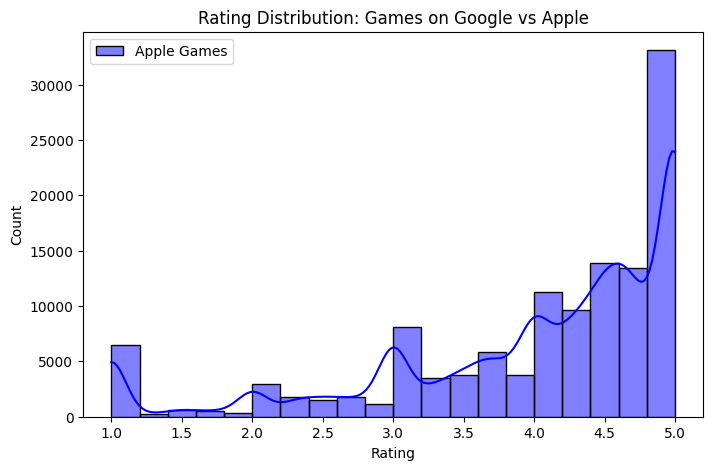

In [43]:
googleGames = googleDataTogether[googleDataTogether['Category'] == 'GAME']
googleGamesRatings = googleGames['Rating'].dropna()
googleGamesRatings = googleGamesRatings[googleGamesRatings > 0] # so there not including games with 0 ratings

# APple Games
appleGames = appleDataTogether[appleDataTogether['Primary_Genre'] == 'Games']
appleGamesRatings = appleGames['Average_User_Rating'].dropna()
appleGamesRatings = appleGamesRatings[appleGamesRatings > 0]

plt.figure(figsize=(8,5))
sns.histplot(googleGamesRatings, label='Google Games', color='red', kde=True, bins=20, alpha=0.5)
sns.histplot(appleGamesRatings, label='Apple Games', color='blue', kde=True, bins=20, alpha=0.5)
plt.title("Rating Distribution: Games on Google vs Apple")
plt.xlabel("Rating")
plt.ylabel("Count")
plt.legend()
plt.show()



Which OS Platform Pays more for Apps?